In [69]:
%pwd

'd:\\study\\economics\\bisieco_analysis\\code_demand_1.nb\\source'

In [27]:
%cd bisieco_analysis/code_demand_1.nb/source/

[WinError 3] 指定されたパスが見つかりません。: 'bisieco_analysis/code_demand_1.nb/source/'
d:\study\economics\bisieco_analysis\code_demand_1.nb\source


c:\Users\Tsunc\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [72]:
#https://zenn.dev/s1ok69oo/articles/3b75bbfd12b6a2
#https://bashtage.github.io/linearmodels/iv/iv/linearmodels.iv.model.IV2SLS.html
#https://pypi.org/project/linearmodels/
#https://qiita.com/shinji_komine/items/b17ac71da1daf73125a4
###https://py4etrics.github.io/index.html

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import random
import warnings

pd.set_option('display.max_rows', 900 )
pd.set_option('display.max_columns', None)
pd.options.display.min_rows = 115

In [73]:
data = pd.read_csv("CleanData_20180222.csv", encoding="shift-jis")
data_hh = pd.read_csv("HHsize.csv")
data_cpi = pd.read_csv("zni2015s.csv", encoding="shift-jis")

In [74]:
df = data[['Maker','Type','Name','Year','Sales','Model','price','kata','weight','FuelEfficiency','HorsePower','overall_length','overall_width','overall_height']]
df.rename(columns={'Year': 'year'}, inplace=True)
df = pd.merge(df, data_hh)

C:\Users\Tsunc\AppData\Local\Temp\ipykernel_18548\242049992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Year': 'year'}, inplace=True)


In [75]:
df["HH"]=df["HH"].str.replace(",","")

In [76]:
data_cpi.drop(index=data_cpi.index[0:5], inplace=True)
data_cpi.rename(columns={'類・品目': 'year', '総合': 'cpi'}, inplace=True)
data_cpi['year'] = data_cpi['year'].astype('int')
data_cpi['cpi'] = data_cpi['cpi'].astype('float')


In [77]:
df = pd.merge(df, data_cpi, on='year')

In [78]:
#df['FuelEfficiency'] = df['FuelEfficiency'].fillna(0)
df = df.dropna(how='any', axis=0)

In [9]:
display(df.head())

,Maker,Type,Name,year,Sales,Model,price,kata,weight,FuelEfficiency,HorsePower,overall_length,overall_width,overall_height,HH,cpi,生鮮食品を除く総合,持家の帰属家賃を除く総合,持家の帰属家賃及び生鮮食品を除く総合,食料（酒類を除く）及びエネルギーを除く総合,食料,生鮮食品,生鮮食品を除く食料,穀類,魚介類,生鮮魚介（再掲）,肉類,乳卵類,野菜・海藻,生鮮野菜（再掲）,果物,生鮮果物（再掲）,油脂・調味料,菓子類,調理食品,飲料,酒類,外食,住居,持家の帰属家賃を除く住居,家賃,持家の帰属家賃を除く家賃,設備修繕・維持,光熱・水道,電気代,ガス代,他の光熱,上下水道料,家具・家事用品,家庭用耐久財,室内装備品,寝具類,家事雑貨,家事用消耗品,家事サービス,被服及び履物,衣料,和服,洋服,シャツ・セーター・下着類,シャツ・セーター類,下着類,履物類,他の被服,被服関連サービス,保健医療,医薬品・健康保持用摂取品,保健医療用品・器具,保健医療サービス,交通・通信,交通,自動車等関係費,通信,教育,授業料等,教科書・学習参考教材,補習教育,教養娯楽,教養娯楽用耐久財,教養娯楽用品,書籍・他の印刷物,教養娯楽サービス,諸雑費,理美容サービス,理美容用品,身の回り用品,たばこ,他の諸雑費,エネルギー,教育関係費,教養娯楽関係費,情報通信関係費,生鮮食品及びエネルギーを除く総合
0,Audi,Foreign,A1シリーズ,2011,4206,1.4 TFSI,289.0,DBA-8XCAX,1190,19.4,122.0,3970,1740,1440,53783435,96.3,96.6,95.4,95.8,97.9,93.5,87.7,94.7,98.8,86.1,85.3,89.1,94.1,92.2,89.6,87.9,88.0,97.8,92.7,92.3,100.6,100.4,95.2,100.7,98.9,101.4,101.6,95.9,88.9,82.2,90.7,110.9,95.5,99.9,110.0,101.7,92.7,92.3,97.4,98.7,95.4,95.9,97.3,95.8,94.4,94.9,93.2,95.0,98.1,94.9,99.5,100.3,101.9,98.2,97.7,92.7,98.0,99.9,95.7,96.3,91.4,95.0,97.1,105.7,94.4,95.8,96.8,94.6,97.5,97.2,85.5,95.9,94.0,92.1,95.7,97.1,100.3,97.1
1,Audi,Foreign,A1シリーズ,2012,4502,1.4 TFSI,273.0,DBA-8XCAX,1190,19.4,122.0,3970,1740,1440,54171475,96.2,96.6,95.4,95.8,97.4,93.6,88.2,94.7,101.7,87.0,85.9,88.3,92.1,91.7,89.0,90.3,90.3,96.5,92.1,93.0,99.5,99.2,95.2,100.4,98.7,101.0,101.1,95.9,92.3,87.0,94.4,113.0,95.8,97.0,100.4,100.1,94.4,93.8,95.6,98.6,95.4,95.8,97.9,95.7,94.6,95.5,92.7,94.5,97.8,95.0,98.7,98.1,100.6,98.4,98.0,92.9,98.9,98.9,96.1,96.6,93.1,95.1,95.6,96.2,93.4,96.3,96.0,94.4,97.4,96.1,85.6,95.9,94.1,95.6,96.1,95.7,99.6,96.7
2,Audi,Foreign,A1シリーズ,2013,5071,1.4 TFSI,273.0,DBA-8XCAX,1190,19.4,122.0,3970,1740,1440,54594744,96.6,96.9,95.8,96.3,97.2,93.4,88.2,94.5,101.2,87.9,86.3,88.5,92.1,91.7,89.3,88.8,88.8,95.9,92.3,92.7,98.0,98.1,95.5,99.9,98.3,100.6,100.7,95.7,96.6,93.2,96.9,122.0,96.3,94.9,93.5,98.2,94.3,94.5,95.2,98.3,95.8,96.3,97.8,96.3,95.2,96.2,93.2,94.2,97.0,95.4,98.1,97.1,98.7,98.5,99.4,92.9,101.5,98.4,96.6,96.9,96.4,95.9,94.6,91.2,93.0,96.5,95.4,95.5,97.4,96.4,89.8,95.9,95.7,101.1,96.5,94.8,98.7,96.5
3,Audi,Foreign,A3シリーズ,2006,4830,アトラクション,284.0,GH-8PBSE,1360,12.2,102.0,4285,1765,1430,51102005,97.2,97.7,96.2,96.8,101.1,91.3,85.7,92.4,97.2,85.4,85.5,86.7,89.6,88.8,85.3,86.0,85.9,96.0,86.3,88.9,107.2,103.1,92.1,101.5,99.2,102.6,103.1,95.0,84.2,79.7,82.6,93.7,94.2,115.6,165.5,116.8,98.8,91.0,101.0,98.2,96.7,97.5,97.8,97.6,95.7,95.4,96.4,94.3,103.6,91.1,100.7,107.6,110.0,94.6,98.4,92.3,97.6,104.0,105.8,111.4,83.4,93.3,107.4,344.1,100.3,94.7,95.9,89.3,98.3,101.3,83.6,66.4,86.8,86.0,103.0,106.3,102.6,98.8
4,Audi,Foreign,A3シリーズ,2007,3874,アトラクション,286.0,GH-8PBSE,1360,12.2,102.0,4285,1765,1430,51713048,97.2,97.7,96.3,96.9,100.8,91.6,86.2,92.7,96.7,86.2,86.5,88.3,89.3,87.5,83.2,90.2,90.3,96.5,86.6,89.4,106.1,101.9,92.8,101.3,99.2,102.4,102.9,95.1,84.8,80.0,83.9,95.1,94.2,113.7,155.4,114.3,98.5,91.9,102.4,98.5,97.2,97.9,97.5,98.0,96.3,96.4,96.0,95.6,103.2,92.0,101.0,106.5,109.5,95.7,98.5,92.4,98.6,101.8,106.5,112.2,84.6,94.2,106.0,286.6,99.1,94.8,96.8,90.0,98.0,101.2,85.3,69.3,87.2,87.5,103.8,105.1,101.0,98.7


In [70]:
display(df.isnull().sum())
l = []
for index, value in df.isnull().sum().items():
    if value > 0:
        l.append(index)
l

Maker                    0
Type                     0
Name                     0
year                     0
Sales                    0
Model                    0
price                    0
kata                     0
weight                   0
FuelEfficiency           0
HorsePower               0
overall_length           0
overall_width            0
overall_height           0
HH                       0
cpi                      0
生鮮食品を除く総合                0
持家の帰属家賃を除く総合             0
持家の帰属家賃及び生鮮食品を除く総合       0
食料（酒類を除く）及びエネルギーを除く総合    0
食料                       0
生鮮食品                     0
生鮮食品を除く食料                0
穀類                       0
魚介類                      0
生鮮魚介（再掲）                 0
肉類                       0
乳卵類                      0
野菜・海藻                    0
生鮮野菜（再掲）                 0
果物                       0
生鮮果物（再掲）                 0
油脂・調味料                   0
菓子類                      0
調理食品                     0
飲料                       0
酒類                       0
外

[]

In [79]:
cpi2016 = data_cpi[data_cpi['year']==2016]
cpi2016 = float(cpi2016.values[0][1])


In [38]:
print(df.dtypes)

Maker                     object
Type                      object
Name                      object
year                       int64
Sales                      int64
Model                     object
price                    float64
kata                      object
weight                     int64
FuelEfficiency           float64
HorsePower               float64
overall_length             int64
overall_width              int64
overall_height             int64
HH                         int32
cpi                      float64
生鮮食品を除く総合                 object
持家の帰属家賃を除く総合              object
持家の帰属家賃及び生鮮食品を除く総合        object
食料（酒類を除く）及びエネルギーを除く総合     object
食料                        object
生鮮食品                      object
生鮮食品を除く食料                 object
穀類                        object
魚介類                       object
生鮮魚介（再掲）                  object
肉類                        object
乳卵類                       object
野菜・海藻                     object
生鮮野菜（再掲）                  object
果物        

In [80]:
df['HH'] = df['HH'].astype('int')
df['price'] = (df['price'] / (df['cpi'] / cpi2016)) / 100
df['size'] = (df['overall_height'] / 1000) * (df['overall_length'] / 1000) * (df['overall_width'] / 1000)
df['hppw'] = df['HorsePower'] / df['weight']
df['car_id'] = le.fit_transform(df['Name'])
df['inside_total'] = df[['year','Sales']].groupby('year').transform(np.sum)
df['outside_total'] = df['HH'] - df['inside_total']
df['share'] = df['Sales'] / df['HH']
df['share0'] = df['outside_total'] / df['HH']

C:\Users\Tsunc\AppData\Local\Temp\ipykernel_18548\3893341780.py:6: FutureWarning: The provided callable <function sum at 0x000002054C4E7420> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df['inside_total'] = df[['year','Sales']].groupby('year').transform(np.sum)


In [81]:
display(df[['inside_total','year','Sales']])

,inside_total,year,Sales
0,3281806,2011,4206
1,4346619,2012,4502
2,4391427,2013,5071
3,4332043,2006,4830
4,4128036,2007,3874
5,3999499,2008,3683
6,3744295,2009,4338
7,4004507,2010,4506
8,3281806,2011,3739
9,4346619,2012,3603


In [82]:
attribute_cols = ['hppw', 'FuelEfficiency', 'size']

for i in attribute_cols:
    df[f"sum_own_{i}"] = df[['year', 'Maker', i]].groupby(['year','Maker']).transform('sum')[i]
    df[f"sqr_{i}"] = df[i] ** 2
    col_name = "sqr_" + i
    df[f"sqr_sum_own_{i}"] = df[['year', 'Maker', col_name]].groupby(['year','Maker']).transform('sum')[col_name]
for i in attribute_cols:
    df[f"sum_market_{i}"] = df[['year', i]].groupby(['year']).transform('sum')[i]
    col_name = "sqr_" + i
    df[f"sqr_sum_market_{i}"] = df[['year', col_name]].groupby(['year']).transform('sum')[col_name]

In [83]:
maker_n = df[['year', 'Maker']].groupby(['year','Maker']).transform('size')
market_n = df[['year']].groupby(['year']).transform('size')

In [84]:
for i in attribute_cols:
    df[f"iv_BLP_own_{i}"] = df[f"sum_own_{i}"] - df[i]
    df[f"iv_BLP_other_{i}"] = df[f"sum_market_{i}"] - df[i]

for i in attribute_cols:
    df[f"iv_GH_own_{i}"] = (maker_n - 1) * df[f"sqr_{i}"] + (df[f"sqr_sum_own_{i}"] - df[f"sqr_{i}"]) - 2 * df[i] * (df[f"sum_own_{i}"] - df[i])
    df[f"iv_GH_other_{i}"] = (market_n - maker_n) * df[f"sqr_{i}"] + (df[f"sqr_sum_market_{i}"] - df[f"sqr_sum_own_{i}"]) - 2 * df[i] * (df[f"sum_market_{i}"] - df[f"sum_own_{i}"])

In [85]:
id_list = np.sort(df['car_id'].unique()).tolist()
J = len(id_list)

In [86]:
random_state = 42

random.seed(random_state)
nippyo_id = np.sort(random.sample(id_list, 30))

In [87]:
df_nippyo = df[['car_id', 'Sales', 'price', 'hppw','FuelEfficiency','size']][df['car_id'].isin(nippyo_id)]
df_nippyo['log_sales'] = np.log(df['Sales'])
df_nippyo['log_price'] = np.log(df['price'])

In [ ]:
display(df_nippyo)

In [88]:
import statsmodels.api as sm

#formula = "log_sales ~ log_price + hppw + FuelEfficiency + size"
X = df_nippyo.drop(['car_id', 'Sales', 'log_sales', 'price'], axis=1)
y = df_nippyo['log_sales']
model = sm.OLS(y, sm.add_constant(X))
result = model.fit()

In [20]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              log_sales   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     9.599
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           3.98e-07
Time:                        19:12:33   Log-Likelihood:                -360.93
No. Observations:                 207   AIC:                             731.9
Df Residuals:                     202   BIC:                             748.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.5312      1.075      4.

In [89]:
print(df[['Sales', 'price', 'hppw','FuelEfficiency','size']].describe())

               Sales        price         hppw  FuelEfficiency         size
count    1823.000000  1823.000000  1823.000000     1823.000000  1823.000000
mean    24586.387274     2.530471     0.099131       16.159737    11.505309
std     40195.267189     1.827153     0.035582        5.550633     2.481950
min        10.000000     0.705176     0.045000        5.500000     5.908998
25%      2975.000000     1.416500     0.076699       12.000000     9.585893
50%      8544.000000     2.050417     0.092683       15.400000    11.472523
75%     27323.500000     2.868792     0.106452       19.400000    13.043144
max    317675.000000    12.626474     0.323864       40.800000    19.154817


In [97]:
#Logit Model

df['logit_share'] = np.log(df['share']) - np.log(df['share0'])

#fromula logit_share ~ price + hppw + FuelEfficiency + size
X = df[['price','hppw','FuelEfficiency','size']]
y = df['logit_share']
ols = sm.OLS(y, sm.add_constant(X)).fit()

In [99]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:            logit_share   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     129.7
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.67e-97
Time:                        21:19:52   Log-Likelihood:                -3401.3
No. Observations:                1823   AIC:                             6813.
Df Residuals:                    1818   BIC:                             6840.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -12.2548      0.375    -32.

In [94]:
#BLP, IV

#2SLS

from linearmodels.iv import IV2SLS

blp = IV2SLS.from_formula("logit_share ~ 1 + hppw + FuelEfficiency + size + \
                [price ~ iv_BLP_own_hppw + iv_BLP_own_FuelEfficiency + iv_BLP_own_size + iv_BLP_other_hppw + iv_BLP_other_FuelEfficiency + iv_BLP_other_size]", df).fit()

dif = IV2SLS.from_formula("logit_share ~ 1 + hppw + FuelEfficiency + size + \
                [price ~ iv_GH_own_hppw + iv_GH_own_FuelEfficiency + iv_GH_own_size + iv_GH_other_hppw + iv_GH_other_FuelEfficiency + iv_GH_other_size]", df).fit()

In [96]:
display(blp.summary)
display(dif.summary)

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:            logit_share   R-squared:                      0.2216
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2199
No. Observations:                1823   F-statistic:                    482.81
Date:                Tue, Apr 09 2024   P-value (F-stat)                0.0000
Time:                        20:33:01   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                               Parameter Estimates                                
==================================================================================
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
Intercept         -12.323     0.3815    -32.304     0.0000     -13.071     -11.576
hppw               0.2129     2.2943     0.0928     0.9261     -4.2839      4.7098
FuelEfficiency     0.1298     0.0097     13.328     0.0000      0.1107      0.1489
size               0.1874     0.0211     8.8598     0.0000      0.1459      0.2288
price             -0.2835     0.0669    -4.2352     0.0000     -0.4147     -0.1523
==================================================================================

Endogenous: price
Instruments: iv_BLP_own_hppw, iv_BLP_own_FuelEfficiency, iv_BLP_own_size, iv_BLP_other_hppw, iv_BLP_other_FuelEfficiency, iv_BLP_other_size
Robust Covariance (Heteroskedastic)
Debiased: False
"""

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:            logit_share   R-squared:                      0.1805
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1787
No. Observations:                1823   F-statistic:                    459.59
Date:                Tue, Apr 09 2024   P-value (F-stat)                0.0000
Time:                        20:33:01   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                               Parameter Estimates                                
==================================================================================
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
Intercept         -12.973     0.3921    -33.084     0.0000     -13.741     -12.204
hppw               8.4256     2.6339     3.1989     0.0014      3.2632      13.588
FuelEfficiency     0.1268     0.0096     13.159     0.0000      0.1079      0.1457
size               0.2363     0.0222     10.660     0.0000      0.1929      0.2798
price             -0.5521     0.0804    -6.8708     0.0000     -0.7096     -0.3946
==================================================================================

Endogenous: price
Instruments: iv_GH_own_hppw, iv_GH_own_FuelEfficiency, iv_GH_own_size, iv_GH_other_hppw, iv_GH_other_FuelEfficiency, iv_GH_other_size
Robust Covariance (Heteroskedastic)
Debiased: False
"""

In [108]:
#self_elasticity

df['own_elas_ols'] = ols.params['price'] * df['price'] * (1 - df['share'])
df['own_elas_blp'] = blp.params['price'] * df['price'] * (1 - df['share'])
df['own_elas_dif'] = dif.params['price'] * df['price'] * (1 - df['share'])

In [111]:
display(df[['own_elas_ols', 'own_elas_blp', 'own_elas_dif']].describe())

,own_elas_ols,own_elas_blp,own_elas_dif
count,1823.000000,1823.000000,1823.000000
mean,-0.645328,-0.717085,-1.396703
std,0.466144,0.517977,1.008890
min,-3.221041,-3.579205,-6.971399
25%,-0.731678,-0.813037,-1.583593
50%,-0.522324,-0.580404,-1.130483
75%,-0.361180,-0.401342,-0.781713
max,-0.179892,-0.199895,-0.389346


In [148]:
display(df[df['size']==17.09437])

,Maker,Type,Name,year,Sales,Model,price,kata,weight,FuelEfficiency,HorsePower,overall_length,overall_width,overall_height,HH,cpi,生鮮食品を除く総合,持家の帰属家賃を除く総合,持家の帰属家賃及び生鮮食品を除く総合,食料（酒類を除く）及びエネルギーを除く総合,食料,生鮮食品,生鮮食品を除く食料,穀類,魚介類,生鮮魚介（再掲）,肉類,乳卵類,野菜・海藻,生鮮野菜（再掲）,果物,生鮮果物（再掲）,油脂・調味料,菓子類,調理食品,飲料,酒類,外食,住居,持家の帰属家賃を除く住居,家賃,持家の帰属家賃を除く家賃,設備修繕・維持,光熱・水道,電気代,ガス代,他の光熱,上下水道料,家具・家事用品,家庭用耐久財,室内装備品,寝具類,家事雑貨,家事用消耗品,家事サービス,被服及び履物,衣料,和服,洋服,シャツ・セーター・下着類,シャツ・セーター類,下着類,履物類,他の被服,被服関連サービス,保健医療,医薬品・健康保持用摂取品,保健医療用品・器具,保健医療サービス,交通・通信,交通,自動車等関係費,通信,教育,授業料等,教科書・学習参考教材,補習教育,教養娯楽,教養娯楽用耐久財,教養娯楽用品,書籍・他の印刷物,教養娯楽サービス,諸雑費,理美容サービス,理美容用品,身の回り用品,たばこ,他の諸雑費,エネルギー,教育関係費,教養娯楽関係費,情報通信関係費,生鮮食品及びエネルギーを除く総合,size,hppw,car_id,inside_total,outside_total,share,share0,sum_own_hppw,sqr_hppw,sqr_sum_own_hppw,sum_own_FuelEfficiency,sqr_FuelEfficiency,sqr_sum_own_FuelEfficiency,sum_own_size,sqr_size,sqr_sum_own_size,sum_market_hppw,sqr_sum_market_hppw,sum_market_FuelEfficiency,sqr_sum_market_FuelEfficiency,sum_market_size,sqr_sum_market_size,iv_BLP_own_hppw,iv_BLP_other_hppw,iv_BLP_own_FuelEfficiency,iv_BLP_other_FuelEfficiency,iv_BLP_own_size,iv_BLP_other_size,iv_GH_own_hppw,iv_GH_other_hppw,iv_GH_own_FuelEfficiency,iv_GH_other_FuelEfficiency,iv_GH_own_size,iv_GH_other_size,logit_share,own_elas_ols,own_elas_blp,own_elas_dif,xi_fit
1500,Toyota,Regular,アルファード,2015,44366,2.5 X,3.194802,DBA-AGH30W,1920,11.6,182.0,4915,1850,1880,56412140,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,17.09437,0.094792,86,4066354,52345786,0.000786,0.927917,3.636999,0.008985,0.374121,643.4,134.56,12995.46,465.632121,292.217486,6127.680657,16.276325,1.833052,3019.4,62351.38,1924.677830,23541.060479,3.542207,16.181533,631.8,3007.8,448.537751,1907.583460,0.017068,0.212864,3047.30,11456.40,1020.352116,4934.283581,-7.073153,-0.814363,-0.904916,-1.762550,1.353730
1501,Toyota,Regular,アルファード,2016,37069,2.5 X,3.198000,DBA-AGH30W,1920,11.6,182.0,4915,1850,1880,56950757,99.9,99.7,99.9,99.7,100.3,101.7,104.6,101.2,101.7,101.8,101.9,101.6,100.3,103.7,105.0,106.8,107.0,100.7,102.5,101.4,100.3,99.6,100.8,99.9,100.4,99.7,99.7,101.0,92.7,92.1,90.4,77.7,100.4,99.6,96.5,96.0,101.4,104.7,99.7,100.0,101.8,101.6,100.0,101.7,101.3,100.9,102.3,104.2,101.0,100.8,100.9,99.9,100.9,101.4,98.0,99.9,97.0,99.1,101.6,101.8,100.4,101.2,101.0,101.0,100.9,100.3,101.1,100.7,100.2,100.1,101.3,101.2,101.0,89.8,101.7,100.8,99.2,100.6,17.09437,0.094792,86,3983817,52966940,0.000651,0.930048,3.842385,0.008985,0.388206,721.0,134.56,15287.38,499.764264,292.217486,6520.212118,16.712820,1.905259,3176.1,67586.05,1974.399901,24147.538874,3.747593,16.618028,709.4,3164.5,482.669894,1957.305531,0.019172,0.236157,3942.58,12698.59,1122.601067,4907.448019,-7.264642,-0.815288,-0.905944,-1.764554,1.164006


In [151]:
display(df[df.index==1501])

,Maker,Type,Name,year,Sales,Model,price,kata,weight,FuelEfficiency,HorsePower,overall_length,overall_width,overall_height,HH,cpi,生鮮食品を除く総合,持家の帰属家賃を除く総合,持家の帰属家賃及び生鮮食品を除く総合,食料（酒類を除く）及びエネルギーを除く総合,食料,生鮮食品,生鮮食品を除く食料,穀類,魚介類,生鮮魚介（再掲）,肉類,乳卵類,野菜・海藻,生鮮野菜（再掲）,果物,生鮮果物（再掲）,油脂・調味料,菓子類,調理食品,飲料,酒類,外食,住居,持家の帰属家賃を除く住居,家賃,持家の帰属家賃を除く家賃,設備修繕・維持,光熱・水道,電気代,ガス代,他の光熱,上下水道料,家具・家事用品,家庭用耐久財,室内装備品,寝具類,家事雑貨,家事用消耗品,家事サービス,被服及び履物,衣料,和服,洋服,シャツ・セーター・下着類,シャツ・セーター類,下着類,履物類,他の被服,被服関連サービス,保健医療,医薬品・健康保持用摂取品,保健医療用品・器具,保健医療サービス,交通・通信,交通,自動車等関係費,通信,教育,授業料等,教科書・学習参考教材,補習教育,教養娯楽,教養娯楽用耐久財,教養娯楽用品,書籍・他の印刷物,教養娯楽サービス,諸雑費,理美容サービス,理美容用品,身の回り用品,たばこ,他の諸雑費,エネルギー,教育関係費,教養娯楽関係費,情報通信関係費,生鮮食品及びエネルギーを除く総合,size,hppw,car_id,inside_total,outside_total,share,share0,sum_own_hppw,sqr_hppw,sqr_sum_own_hppw,sum_own_FuelEfficiency,sqr_FuelEfficiency,sqr_sum_own_FuelEfficiency,sum_own_size,sqr_size,sqr_sum_own_size,sum_market_hppw,sqr_sum_market_hppw,sum_market_FuelEfficiency,sqr_sum_market_FuelEfficiency,sum_market_size,sqr_sum_market_size,iv_BLP_own_hppw,iv_BLP_other_hppw,iv_BLP_own_FuelEfficiency,iv_BLP_other_FuelEfficiency,iv_BLP_own_size,iv_BLP_other_size,iv_GH_own_hppw,iv_GH_other_hppw,iv_GH_own_FuelEfficiency,iv_GH_other_FuelEfficiency,iv_GH_own_size,iv_GH_other_size,logit_share,own_elas_ols,own_elas_blp,own_elas_dif,xi_fit
1501,Toyota,Regular,アルファード,2016,37069,2.5 X,3.198,DBA-AGH30W,1920,11.6,182.0,4915,1850,1880,56950757,99.9,99.7,99.9,99.7,100.3,101.7,104.6,101.2,101.7,101.8,101.9,101.6,100.3,103.7,105.0,106.8,107.0,100.7,102.5,101.4,100.3,99.6,100.8,99.9,100.4,99.7,99.7,101.0,92.7,92.1,90.4,77.7,100.4,99.6,96.5,96.0,101.4,104.7,99.7,100.0,101.8,101.6,100.0,101.7,101.3,100.9,102.3,104.2,101.0,100.8,100.9,99.9,100.9,101.4,98.0,99.9,97.0,99.1,101.6,101.8,100.4,101.2,101.0,101.0,100.9,100.3,101.1,100.7,100.2,100.1,101.3,101.2,101.0,89.8,101.7,100.8,99.2,100.6,17.09437,0.094792,86,3983817,52966940,0.000651,0.930048,3.842385,0.008985,0.388206,721.0,134.56,15287.38,499.764264,292.217486,6520.212118,16.71282,1.905259,3176.1,67586.05,1974.399901,24147.538874,3.747593,16.618028,709.4,3164.5,482.669894,1957.305531,0.019172,0.236157,3942.58,12698.59,1122.601067,4907.448019,-7.264642,-0.815288,-0.905944,-1.764554,1.164006


In [194]:
# Demand Curve

df['xi_fit'] = dif.resids

def f_share(price_cand, year, model_id_target, dt, estparam):
    dt = dt[dt['year']==2016]
    dt['temp_price'] = np.where(dt['car_id'] == model_id_target, price_cand, dt['price'])
    dt['delta'] = estparam + estparam*dt['temp_price'] + estparam*dt['hppw'] + estparam*dt['FuelEfficiency'] + estparam*dt['size'] + dt['xi_fit']
    dt['denom'] = 1 + sum(np.exp(dt['delta']))
    dt['pred_sales'] = np.exp(dt['delta'])/dt['denom']*dt['HH']
    dt = dt[dt['car_id']==model_id_target]
    return dt['pred_sales']

In [172]:
estparam = dif.params['price']
display(estparam)

-0.5521272604004047

In [183]:
def frange(start, end , step):
    if step == 0:
        raise ValueError('step must not be zero')

    start = float(start)
    end = float(end)
    step = float(step)

    # range関数と同様な振る舞いにする
    if abs(step) > abs(start - end):
        return [start]
    if step > 0 and end - start < 0:
        return []
    elif step < 0 and end - start > 0:
        return []

    exp = len(str(step).split('.')[1])  # 丸める際に使用する桁数
    result = [start]
    val = start
    if step > 0:
        while (val := round(val + step, exp)) < end:
            result.append(val)
    else:
        while (val := round(val + step, exp)) > end:
            result.append(val)
    return result

for num in frange(0.0, 0.5, 0.1):
    print(num)

0.0
0.1
0.2
0.3
0.4


In [197]:
estparam = dif.params['price']
name_id_target = 86

pricevec = [n for n in frange(0.3,5,0.05)]
quantvec = [0] * len(pricevec)
revenuevec = [0] * len(pricevec)
print(pricevec)
for i in range(len(pricevec)):
    quantvec[i] = f_share(price_cand=pricevec[i],year=2016,model_id_target=name_id_target, dt=df, estparam=estparam)
    revenuevec[i] = pricevec[i] * quantvec[i]


[0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5, 1.55, 1.6, 1.65, 1.7, 1.75, 1.8, 1.85, 1.9, 1.95, 2.0, 2.05, 2.1, 2.15, 2.2, 2.25, 2.3, 2.35, 2.4, 2.45, 2.5, 2.55, 2.6, 2.65, 2.7, 2.75, 2.8, 2.85, 2.9, 2.95, 3.0, 3.05, 3.1, 3.15, 3.2, 3.25, 3.3, 3.35, 3.4, 3.45, 3.5, 3.55, 3.6, 3.65, 3.7, 3.75, 3.8, 3.85, 3.9, 3.95, 4.0, 4.05, 4.1, 4.15, 4.2, 4.25, 4.3, 4.35, 4.4, 4.45, 4.5, 4.55, 4.6, 4.65, 4.7, 4.75, 4.8, 4.85, 4.9, 4.95]


C:\Users\Tsunc\AppData\Local\Temp\ipykernel_18548\1177096917.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['temp_price'] = np.where(dt['car_id'] == model_id_target, price_cand, dt['price'])
C:\Users\Tsunc\AppData\Local\Temp\ipykernel_18548\1177096917.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['delta'] = estparam + estparam*dt['temp_price'] + estparam*dt['hppw'] + estparam*dt['FuelEfficiency'] + estparam*dt['size'] + dt['xi_fit']
C:\Users\Tsunc\AppData\Local\Temp\ipykernel_18548\11770969

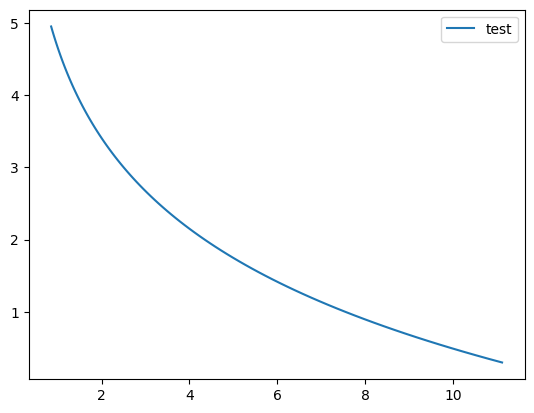

In [198]:
# データ生成
x = quantvec
y = pricevec 

# プロット
plt.plot(x, y, label="test")

# 凡例の表示
plt.legend()

# プロット表示(設定の反映)
plt.show()